# Homework 4
## Excersize 1: Erdos-Renyi random graph
The Erdos-Renyi random graph: This model has two parameters, n and p. <br>
It consists of n nodes and each of then (n - 1)/2 possible edges is  <br>
present independently with a probability p.

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import math
import scipy
import seaborn as sns
from scipy.stats import binom, powerlaw,norm

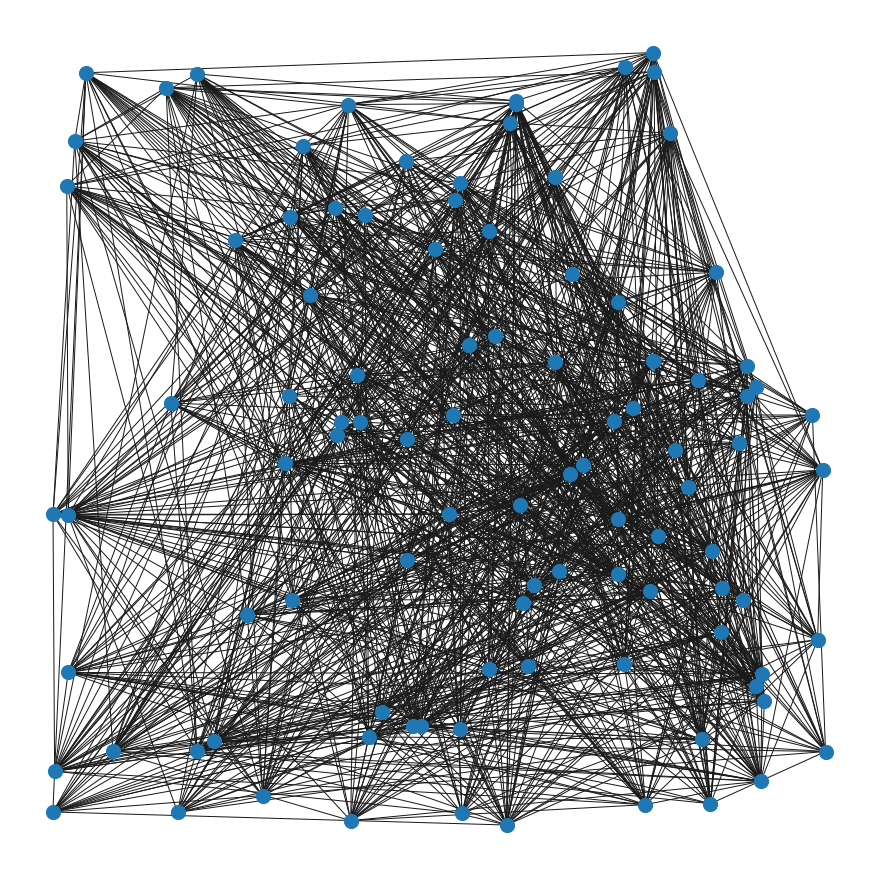

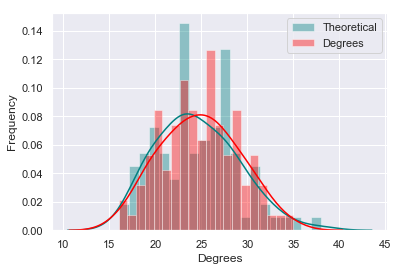

In [2]:
sns.set()
number_nodes = 100
probability_edge = 0.25
adjacency_matrix = np.zeros((number_nodes, number_nodes))
index = list(itertools.combinations(range(number_nodes),2))

for i in index:
    random_number = np.random.random(1)
    if random_number < probability_edge:
        adjacency_matrix[i[0]][i[1]] = 1
        adjacency_matrix[i[1]][i[0]] = 1

rows, cols = np.where(adjacency_matrix == 1)    
edges = zip(rows.tolist(), cols.tolist())        

gr = nx.Graph()
gr.add_edges_from(edges)
plt.figure(3,figsize=(12,12)) 
nx.draw_random(gr, node_size=200, font_size=10)
plt.show()


degrees = [gr.degree(n) for n in gr.nodes()]
# The theoretical binomial distribution plot together with the actual distribution of degrees in the nertwork
n = number_nodes
p = probability_edge
data_binom = binom.rvs(n,p,loc=0,size=number_nodes)

ax=sns.distplot(data_binom, kde=True, bins=20,color='teal', label ='Theoretical')
ax=sns.distplot(degrees,kde=True, bins=20, color = 'red',label = 'Degrees')#,hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Degrees', ylabel='Frequency')
plt.legend()

plt.show()



## Excercise 2: The Watts-Strogatz small world model
This model has three parameters, n, c,and p. c should be even.  It consists of n nodes situated on a circle, <br>
each connected to its c nearest neighbors (so that c=2 gives an ordinary circle).<br>
To this graph is then added random shortcuts through the following procedure: <br>
for each edge in the original graph, pick two random nodes and add an edge between these with probability p; <br>
or replace if the edge is already there.

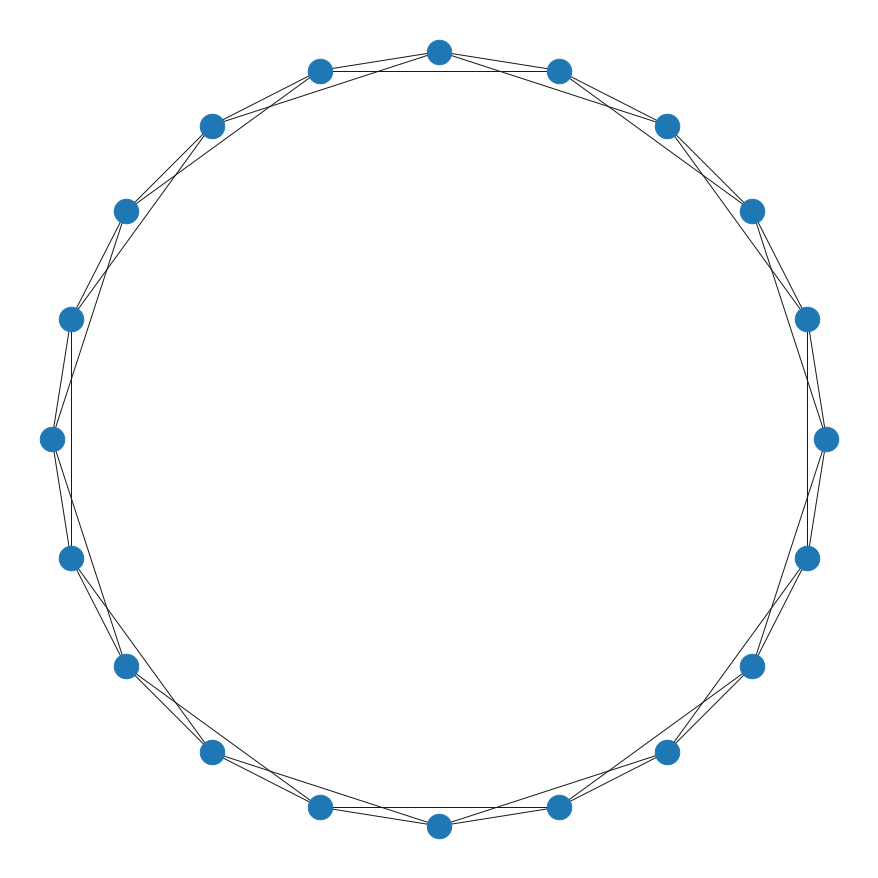

In [1003]:
# Create n nodes on a circle
number_nodes = 20
number_neighbours = 4

theta = np.linspace(0, 2*np.pi, number_nodes)
r = np.sqrt(1)
x = r*np.cos(theta)
y = r*np.sin(theta)

# Creates a dictionary that contains the nodes coordinates
node_positions = {}
for i in range(len(x)):
    node_positions[i] = (x[i], y[i])

# Create edges to every nodes c closest neighbours, 
# the information about the edges is stored in the adjacency matrix
adjacency_matrix = np.zeros((number_nodes, number_nodes))
for i in range(-number_nodes,number_nodes):
    for j in range(1, int(number_neighbours/2)+1):
        if i+j > number_nodes-1:
            i = i+j - number_nodes 
            adjacency_matrix[i][i+j] = 1
            adjacency_matrix[i+j][i] = 1

        else:
            adjacency_matrix[i][i+j] = 1
            adjacency_matrix[i+j][i] = 1

rows, cols = np.where(adjacency_matrix == 1) 
edges = zip(rows.tolist(), cols.tolist())  

# Creating the network
plt.figure(3,figsize=(12,12)) 
gr = nx.Graph()

# Adding nodes
for i in range(len(node_positions)):
    gr.add_node(i, pos=node_positions[i])

# Adding edges
gr.add_edges_from(edges)

nx.draw_circular(gr,node_size=600, font_size=10)
plt.show()

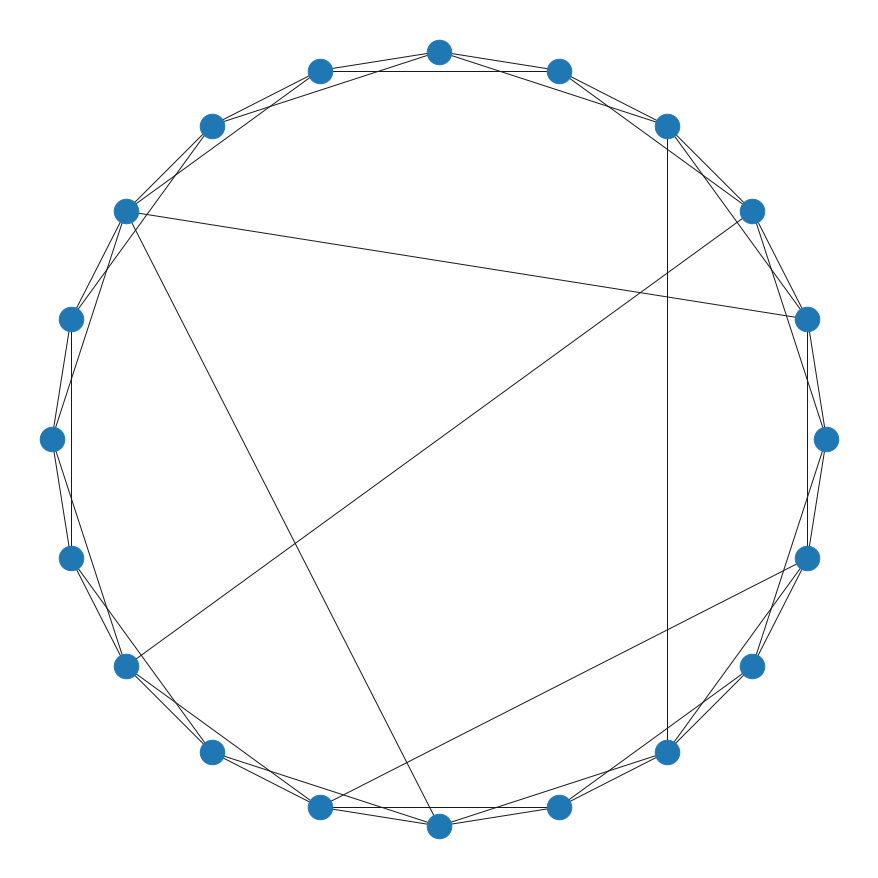

In [1004]:
# For each edge add an (or replace) one random node with probability p
number_edges = gr.number_of_edges()
probability_new_edge = 0.2

for i in range(number_edges):
    random_number = np.random.random()
    if random_number < probability_new_edge:
        index = (np.random.randint(number_nodes),np.random.randint(number_nodes))
        adjacency_matrix[index[0]][index[1]] = 1

rows, cols = np.where(adjacency_matrix == 1) 
new_edges = zip(rows.tolist(), cols.tolist()) 
plt.figure(3,figsize=(12,12)) 
gr_new = nx.Graph()

# Adding nodes
for i in range(len(node_positions)):
    gr_new.add_node(i, pos=node_positions[i])

# Adding edges
gr_new.add_edges_from(new_edges)

nx.draw_circular(gr_new,node_size=600, font_size=10)
plt.show()

## Excercise 3: The Albert-Barabasi preferential growth model:
This is a model of network formation with one important parameter, m. <br>
It starts with some configuration of n0 >= m connected nodes. <br>
Then, at each time step for some given number of steps, we add a new node withmnew connections.<br>

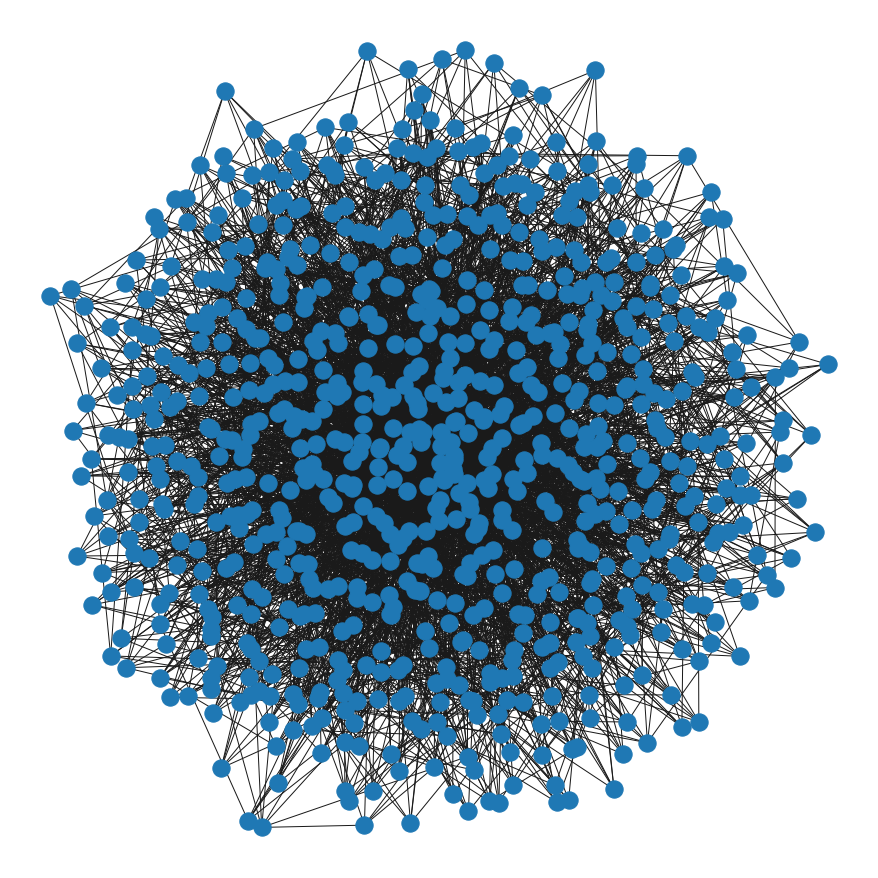

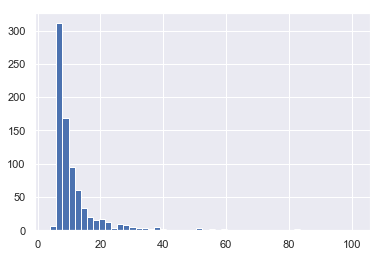

In [983]:
# Create n nodes on a circle
number_nodes = 2
new_connections =6

adjacency_matrix = np.zeros((number_nodes, number_nodes))
adjacency_matrix[0][1] = 1
adjacency_matrix[1][0] = 1

p = np.sum(adjacency_matrix, axis=0)/np.sum(adjacency_matrix)
for i in range(800):
    # Creating new edges to new node, with a certain probability
    probabilities = np.sum(adjacency_matrix, axis=0)/np.sum(adjacency_matrix)
    possible = np.where(probabilities)
    prob = probabilities.tolist()
    node = possible[0].tolist()
    index = np.random.choice(node, new_connections, p=prob)
    
    new_row = np.zeros(number_nodes)
    new_column = np.zeros(number_nodes+1)
    for i in index:
        new_row[i] = 1
        new_column[i] = 1  
    
   # adding row and column to adjacency matrix
    adjacency_matrix = np.vstack ((adjacency_matrix, new_row) ) 
    adjacency_matrix = np.column_stack((adjacency_matrix, new_column)) 
    
    number_nodes+=1

rows, cols = np.where(adjacency_matrix == 1) 
edges = zip(rows.tolist(), cols.tolist())

# Creating the network
plt.figure(3,figsize=(12,12)) 
nw = nx.Graph()

nw.add_edges_from(edges)
nx.draw(nw ,node_size=300, font_size=10)
plt.show()

degrees = [nw.degree(n) for n in nw.nodes()]
plt.hist(degrees, bins=50)

#ax = plt.hist(data_binom, bins=15)
#ax = sns.distplot(degrees,kde=True, bins=20)#,hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Degrees', ylabel='Frequency')

plt.show()

/Users/emmarydholm/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


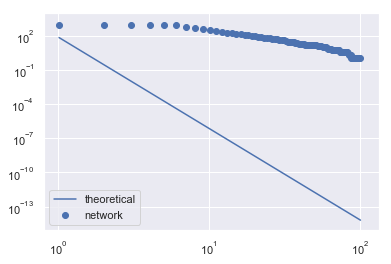

In [985]:
m =  new_connections
k = np.linspace(0, max(degrees),max(degrees))
power_dist = 2*m**2*k**-8

degrees = np.array(degrees)
degree_pdf = []
for i in range(max(degrees)):
    
    degree_pdf.append(np.sum(degrees == i))
degree_pdf = np.flip(degree_pdf)    
degree_cdf = np.flip(np.cumsum(degree_pdf))

fig = plt.figure()
ax = plt.subplot(111)
ax.loglog(k, power_dist, label='theoretical')
ax.scatter(k, degree_cdf, label = 'network')
ax.legend()

## Exercise 4: Routine for calculating the clustering coeffcients


In [1010]:
#np.savetxt("small_world.csv", A, delimiter=",")


In [1011]:
adjacency_matrix = np.genfromtxt('small_world.csv', delimiter=',')
sum_traces = 0

# Calculate number of triangles
A_squared = np.dot(adjacency_matrix,adjacency_matrix)
A_qube = np.dot(adjacency_matrix,A_squared)

sum_traces += np.matrix.trace(A_qube)
number_triangles = sum_traces / 6

# Calculate number of connecter
edges_on_node = np.sum(adjacency_matrix, axis=1)
numbers_connected_triplets = (edges_on_node*(edges_on_node-1))/2
sum_connected_triplets = sum(numbers_connected_triplets)

# Calculate the clustering coefficient
clustering_coefficient = 3*number_triangles/sum_connected_triplets

clustering_coefficient = round(clustering_coefficient, 6)
print(f'The clustering coefficient is {clustering_coefficient}')

The clustering coefficient is 0.61128


## Excersise 5: Average path lengths and diameters 


In [835]:
adjacency_matrix = np.array(A)
distance_matrix = np.zeros((adjacency_matrix.shape))
a = adjacency_matrix

for path_length in range(1,a.shape[0]):
    b = np.linalg.matrix_power(a, path_length)#adjacency_matrix.shape[0])
    path = np.where(b>0)

    for i,j in zip(path[0],path[1]):
        if i!=j and distance_matrix[i][j] == 0:
            distance_matrix[i][j] = path_length
            distance_matrix[j][i] = path_length
    
# calculate average path length and diameter
average_path_length = np.sum(distance_matrix)/(a.shape[0]*(a.shape[0]-1))
diameter = np.max(distance_matrix)

print(f'The average path length is: {average_path_length} and the diameter is: {diameter}.')


The average path length is: 2.9323232323232324 and the diameter is: 5.0.
